In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LogNorm
import copy

# Fixing random state for reproducibility
np.random.seed(19680801)

# Logical Volume

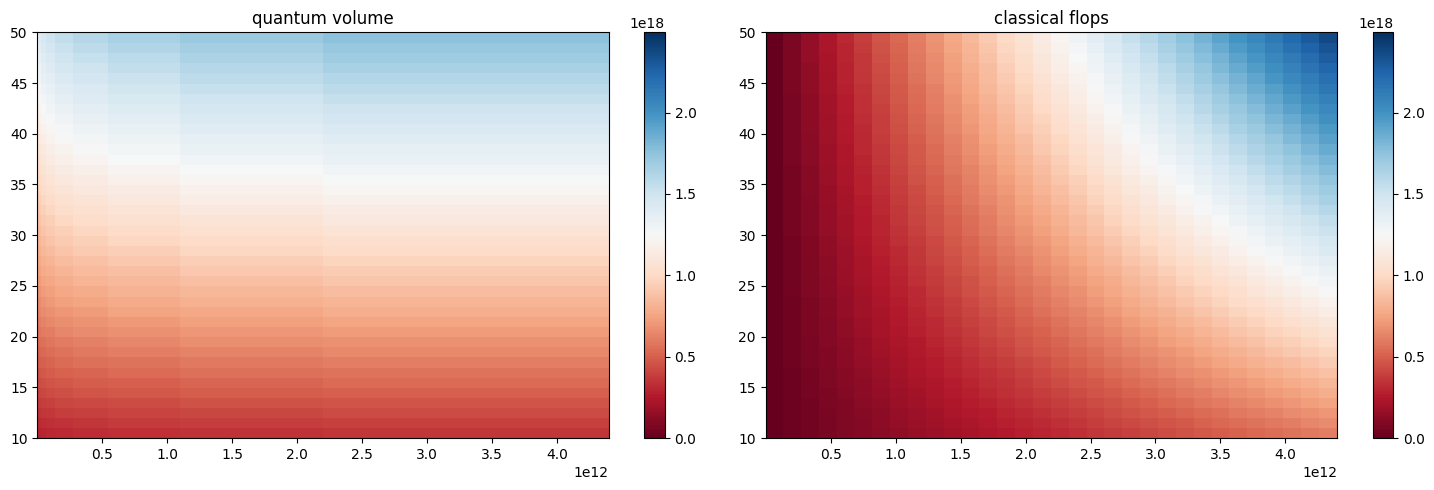

In [3]:
def plot_logical_volume(): # set this function to avoid conflict variables
    s_start = 10
    s_end = 50
    ds = 1

    k = 1000
    epsilon = 0.01
    bits = 10


    n_start = 10
    n_end = 42
    dn = 1

    s, n = np.mgrid[s_start:s_end+ds:ds, n_start:n_end + dn:dn]

    # quantum volume
    nhs = np.sqrt(80 / 3) * np.pi * k**2 * s / epsilon**2 # here we assume that there are s summands
    q_alg_phs = bits + 2 * n + 2
    q_lgc_phs = 2 * q_alg_phs + np.ceil(np.sqrt(8 * q_alg_phs)) + 1
    log_depth_phs = 10 * n + 609
    volumn = nhs * q_lgc_phs * log_depth_phs

    # classical volume
    N_start = 2**n_start
    N_end = 2**n_end
    N_steps = n_end - n_start
    dN = (N_end - N_start) / N_steps

    _, N = np.mgrid[s_start:s_end+ds:ds, N_start:N_end + dN:dN]

    flops = 0.5 * k * np.log(2 / epsilon) * (4 * N * s + 14 * N)


    # plot
    fig, axs = plt.subplots(1,2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})

    all_min = min(np.min(volumn), np.min(flops))
    all_max = max(np.max(volumn), np.max(flops))

    ax = axs[0]
    c = ax.pcolor(2**n, s, volumn[:-1,:-1], cmap='RdBu', vmin=all_min, vmax=all_max)
    ax.set_title('quantum volume')
    fig.colorbar(c, ax=ax)

    ax = axs[1]
    c = ax.pcolor(N, s, flops[:-1,:-1], cmap='RdBu', vmin=all_min, vmax=all_max)
    ax.set_title('classical flops')
    fig.colorbar(c, ax=ax)

    plt.tight_layout()
    plt.show()

plot_logical_volume()

# Runtime

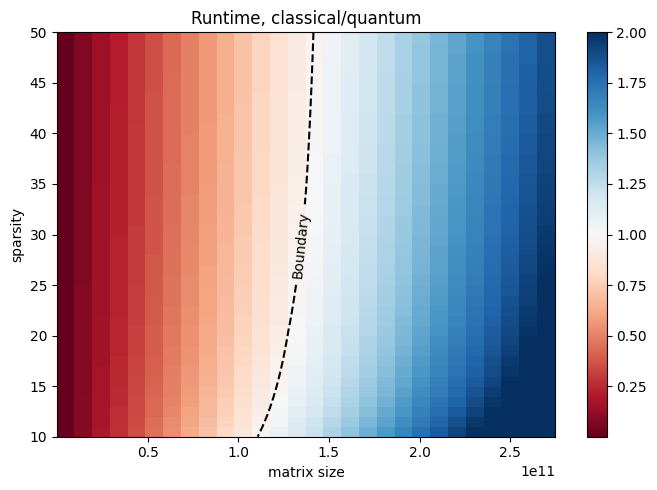

In [35]:
def plot_runtime():  # set this function to avoid conflict variables
    s_start = 10
    s_end = 50
    ds = 1

    # runtime is less advantageous, so we set more stringent parameters
    k = 100
    epsilon = 0.1
    # bits = 10  this parameter is implicitly used in the per_hs_runtime

    n_start = 10
    n_end = 38
    dn = 1

    s, n = np.mgrid[s_start : s_end + ds : ds, n_start : n_end + dn : dn]

    # quantum volume
    nhs = (
        np.sqrt(80 / 3) * np.pi * k**2 * s / epsilon**2
    )  # here we assume that there are s summands
    per_hs_runtime = (3000000 + 70000 * n )* 1e-9
    q_runtime = nhs*per_hs_runtime

    # classical volume
    N_start = 2**n_start
    N_end = 2**n_end
    N_steps = n_end - n_start
    dN = (N_end - N_start) / N_steps

    _, N = np.mgrid[s_start : s_end + ds : ds, N_start : N_end + dN : dN]

    flops = 0.5 * k * np.log(2 / epsilon) * (4 * N * s + 14 * N)
    c_runtime = flops * 1e-9

    # ratio = c_runtime / q_runtime this is wrong
    ratio = c_runtime
    for i in range(0, N.shape[0]):
        for j in range(0, N.shape[1]):
            q_j= np.floor(np.log2(N[i, j])).astype(int) - n_start
            ratio[i,j] = ratio[i,j] / q_runtime[i,q_j]

    # all_min = min(np.min(q_runtime), np.min(c_runtime))
    # all_max = max(np.max(q_runtime), np.max(c_runtime))

    # plot
    fig, ax = plt.subplots(1,figsize=(7, 5))

    # ax = axs[0]
    # c = ax.pcolor(2**n, s, q_runtime[:-1, :-1], cmap="RdBu", vmin=all_min, vmax=all_max)
    # ax.set_title("QLSA runtime, k = 100, epsilon = 0.1")
    # ax.set_xlabel("matrix size")
    # ax.set_ylabel("sparsity")
    # cbar = fig.colorbar(c, ax=ax)
    # cbar.set_label('runtime (seconds)')

    # ax = axs[1]
    # c = ax.pcolor(N, s, c_runtime[:-1, :-1], cmap="RdBu", vmin=all_min, vmax=all_max)
    # ax.set_title("classical flops")
    # fig.colorbar(c, ax=ax)

    # ax.text(2**37, 30, "-->QAB area", fontsize=10, color="black")
    
    c = ax.pcolor(N, s, ratio[:-1, :-1], cmap="RdBu", vmin=ratio.min(), vmax=2)
    ax.set_title("Runtime, classical/quantum")
    fig.colorbar(c, ax=ax)   
    ax.set_xlabel("matrix size")
    ax.set_ylabel("sparsity")
    contour = ax.contour(
        N,
        s,
        ratio,
        levels=[1],
        colors="black",
        linewidths=1.5,
        linestyles="--",
    )
    ax.clabel(contour, fmt="Boundary", fontsize = 10,colors="black")

   

    plt.tight_layout()
    plt.show()


plot_runtime()

AttributeError: PolyQuadMesh.set() got an unexpected keyword argument 'v'

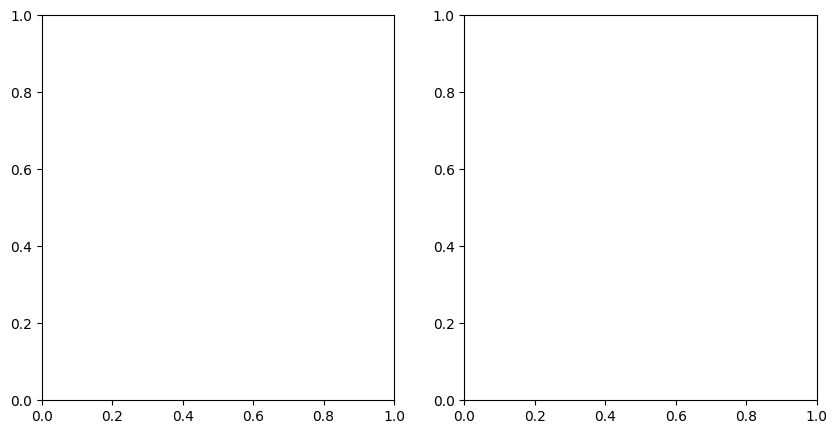

In [38]:
# Now we try to plot using exponential matirx size 

def plot_runtime_exp():  # set this function to avoid conflict variables
    s_start = 10
    s_end = 50
    ds = 1

    # runtime is less advantageous, so we set more stringent parameters
    k = 100
    epsilon = 0.1
    # bits = 10  this parameter is implicitly used in the per_hs_runtime

    n_start = 1
    n_end = 15 
    dn = 1

    # n is the exponent of matrix size with base 10
    s, n = np.mgrid[s_start : s_end + ds : ds, n_start : n_end + dn : dn]

    # quantum volume
    nhs = (
        np.sqrt(80 / 3) * np.pi * k**2 * s / epsilon**2
    )  # here we assume that there are s summands
    per_hs_runtime = (3000000 + 70000 * np.log2(10**n) )* 1e-9
    q_runtime = nhs*per_hs_runtime

    # classical volume
    # N_start = 2**n_start
    # N_end = 2**n_end
    # N_steps = n_end - n_start
    # dN = (N_end - N_start) / N_steps

    # _, N = np.mgrid[s_start : s_end + ds : ds, N_start : N_end + dN : dN]

    flops = 0.5 * k * np.log(2 / epsilon) * (4 * 10**n * s + 14 * 10**n)
    c_runtime = flops * 1e-9

    # ratio = c_runtime / q_runtime this is wrong
    # ratio = c_runtime
    # for i in range(0, N.shape[0]):
    #     for j in range(0, N.shape[1]):
    #         q_j= np.floor(np.log2(N[i, j])).astype(int) - n_start
    #         ratio[i,j] = ratio[i,j] / q_runtime[i,q_j]

    # all_min = min(np.min(q_runtime), np.min(c_runtime))
    # all_max = max(np.max(q_runtime), np.max(c_runtime))

    # plot
    fig, axs = plt.subplots(1,2, figsize=(10, 5))

    ax = axs[0]
    c = ax.pcolor(n, s, q_runtime[:-1, :-1], cmap="RdBu", vmin=q_runtime.min(), v=q_runtime.max())
    ax.set_title("QLSA runtime, k = 100, epsilon = 0.1")
    ax.set_xlabel("matrix size")
    ax.set_ylabel("sparsity")
    cbar = fig.colorbar(c, ax=ax)
    cbar.set_label('runtime (seconds)')

    ax = axs[1]
    c = ax.pcolor(n, s, c_runtime[:-1, :-1], cmap="RdBu", vmin=c_runtime.min(), vmax=c_runtime.max())
    ax.set_title("classical flops")
    fig.colorbar(c, ax=ax)

    # ax.text(2**37, 30, "-->QAB area", fontsize=10, color="black")
    
    # c = ax.pcolor(N, s, ratio[:-1, :-1], cmap="RdBu", vmin=ratio.min(), vmax=2)
    # ax.set_title("Runtime, classical/quantum")
    # fig.colorbar(c, ax=ax)   
    # ax.set_xlabel("matrix size")
    # ax.set_ylabel("sparsity")
    # contour = ax.contour(
    #     N,
    #     s,
    #     ratio,
    #     levels=[1],
    #     colors="black",
    #     linewidths=1.5,
    #     linestyles="--",
    # )
    # ax.clabel(contour, fmt="Boundary", fontsize = 10,colors="black")

   

    plt.tight_layout()
    plt.show()

plot_runtime_exp()


## Runtime

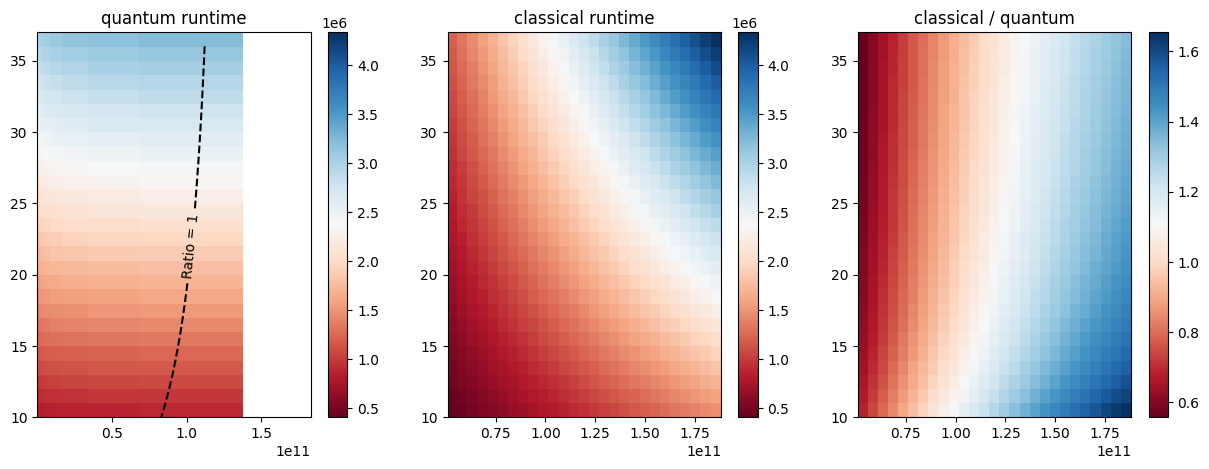

In [55]:


start = 10
sap_range = 27

# truncated_hsruntimes = hsruntimes[start: start + sap_range]


k = 100
epsilon = 0.1


ds = 1
dn = 1 # dimension equasion 2^n

bits = 10

s1, n = np.mgrid[start *ds: (start + sap_range) * ds + ds : ds, start *dn : (sap_range + start) * dn + dn : dn]
# the number of hamiltonian simulation
# here we assume that the one sparese decomposition is optimal, and
# is done in the application level, so the dependence on s
# is s, and there is no graph coloring cost for each hamiltonian simulation
nhs = np.sqrt(80 / 3) * np.pi * k**2 * s1 / epsilon**2 # number of hamiltonian simulation
nhs = nhs[:-1, :-1]
n_cut = n[:-1, :-1]
qruntime = nhs * (3000000 + 70000*n_cut)  / 1e9 # change runtime from nanoseconds to seconds


# print(runtime.max() / 1e9)
# print(nhs)
# print("runtime: \n\n\n\n\n")
# print(runtime)
maxN = 2**(start  + sap_range)
minN = 2**start
dN = maxN / sap_range
s, N = np.mgrid[start*ds : (start + sap_range) * ds + ds : ds, start * dN : (start + sap_range) * dN + dN : dN]
flops = 1 / 2 * k * np.log(2 / epsilon) * (4 * N * s + 14 * N)
flops = flops[:-1, :-1]
flops_min , flops_max = flops.min(), flops.max()
cruntime = flops / 1e9 # assume 1GFLOPS


ratio = cruntime / qruntime

all_min = np.min([qruntime.min(), cruntime.min()])
all_max = np.max([qruntime.max(), cruntime.max()])


fig, axs = plt.subplots(1,3,figsize=(15, 5))
ax = axs[0]
# 使用 pcolor 绘制
expn = 2**n
c = ax.pcolor(expn, s1, qruntime, cmap="RdBu", vmin=all_min, vmax=all_max)
ax.set_title("quantum runtime")
fig.colorbar(c, ax=ax)


# print(expn.shape)
# print(s1.shape)

contour = ax.contour(
    N[:-1, :-1],
    s1[:-1, :-1],
    ratio,
    levels=[1],
    colors="black",
    linewidths=1.5,
    linestyles="--",
)
ax.clabel(contour, fmt="Ratio = 1", colors="black")

ax = axs[1]
# 使用 pcolor 绘制
c = ax.pcolor(N, s1, cruntime, cmap="RdBu", vmin=all_min, vmax=all_max)
ax.set_title("classical runtime")
fig.colorbar(c, ax=ax)


ax = axs[2]
# 使用 pcolor 绘制
c = ax.pcolor(N, s1, ratio, cmap="RdBu", vmin=ratio.min(), vmax=ratio.max())
ax.set_title("classical / quantum")
fig.colorbar(c, ax=ax)
#